In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
import seaborn as sns
import random

from imblearn.over_sampling import SMOTE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

warnings.filterwarnings("ignore")
%matplotlib inline

### Read all CSV files

In [127]:
dartmouth = pd.read_csv("dartmouth.csv")
colby = pd.read_csv("colby.csv")
northeastern = pd.read_csv("northeastern.csv")
princeton = pd.read_csv("princeton.csv")
columbia = pd.read_csv("columbia.csv")
harvard = pd.read_csv("harvard.csv")

In [135]:
harvard.head()

,type,act,sat2400,gpaWeighted,gpaCumulative,satConcorded,resultCode
0,RD,21,1590,3.2844,3.1120,1150,True
1,RD,21,1590,3.2844,3.1120,1150,True
2,EA,0,2030,3.9161,3.9161,1430,True
3,EA,0,2080,4.0000,4.0000,1450,True
4,EA,0,1990,2.9241,2.9241,1400,False


### Relabel target variables

In [128]:
datasets = [dartmouth, colby, princeton, northeastern, columbia, harvard]
def relabel_target(data):
    data['resultCode']=data['resultCode'].apply(lambda x: False if x ==2 else True)
    
for x in datasets:
    relabel_target(x)

### Check for class imbalance

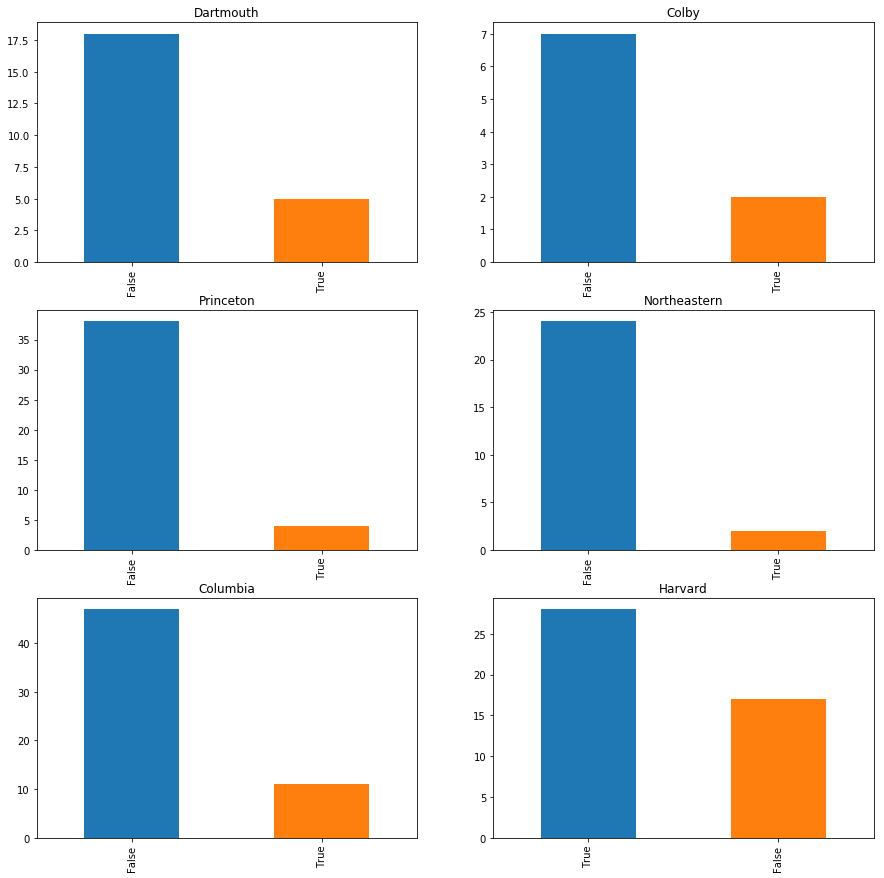

In [199]:
f = plt.figure(figsize=(15,15))

ax1=f.add_subplot(321)
dartmouth['resultCode'].value_counts().plot(kind='bar', title="Dartmouth" )


f.add_subplot(322)
colby['resultCode'].value_counts().plot(kind='bar', title="Colby" )

f.add_subplot(323)
princeton['resultCode'].value_counts().plot(kind='bar', title="Princeton" )

f.add_subplot(324)
northeastern['resultCode'].value_counts().plot(kind='bar', title="Northeastern" )

f.add_subplot(325)
columbia['resultCode'].value_counts().plot(kind='bar', title="Columbia" )

f.add_subplot(326)
harvard['resultCode'].value_counts().plot(kind='bar', title="Harvard" )

plt.show()

### Check for class imbalance

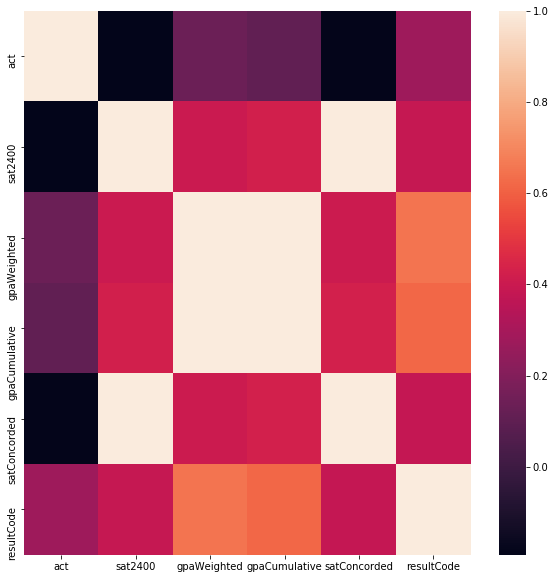

In [71]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values)
plt.show()

### Define KNN for Smote(upsampling) and plot scatter plots

In [308]:
def process_data(data, college):
    
    knn_constants={'dartmouth':4, 'colby':1, 'princeton':1, 'northeastern':1, 'columbia':5, 'harvard':5}
    knn_cons = knn_constants.get(college)
    
    data = data.drop(data[data.sat2400 <= 0].index)
    train_y = data.resultCode
    train_x = pd.DataFrame(data.drop(["resultCode","act" ,"type", "gpaCumulative", "satConcorded"], axis=1)).reset_index(drop=True)
    
    print("Before OverSampling, counts of label '1': {}".format(sum(train_y==True)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y==False)))

    sm = SMOTE(random_state=2, k_neighbors=knn_cons)
    x_train_smote, y_train_smote = sm.fit_sample(train_x, train_y.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==True)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==False)))
    
    x_train_smote=pd.DataFrame(x_train_smote)
    x_train_smote.columns =[ 'sats', 'gpa']
    
    
    fig = plt.figure(figsize=(10,10))
    for i, tar in enumerate(np.unique(y_train_smote)):
        Xi = x_train_smote[y_train_smote==tar]
        plt.scatter(Xi.iloc[:,0], Xi.iloc[:,1], label=tar)
    plt.xlabel('Sat Score')
    plt.ylabel('GPA')
    plt.title(college.upper())
    plt.legend()
    plt.show()
    
    return (x_train_smote, y_train_smote)

Before OverSampling, counts of label '1': 9
Before OverSampling, counts of label '0': 38 

After OverSampling, the shape of train_X: (50, 5)
After OverSampling, the shape of train_y: (50,) 

After OverSampling, counts of label '1': 25
After OverSampling, counts of label '0': 25


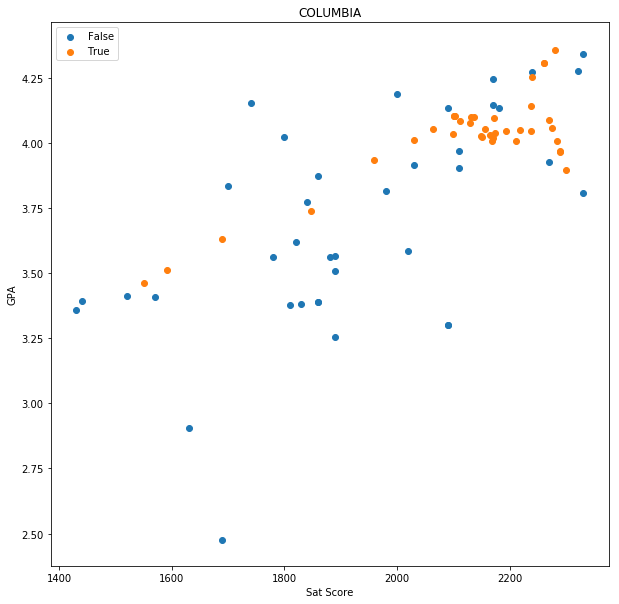

In [309]:
X_columbia, y_columbia = process_data(columbia, "columbia")

Before OverSampling, counts of label '1': 25
Before OverSampling, counts of label '0': 16 

After OverSampling, the shape of train_X: (50, 5)
After OverSampling, the shape of train_y: (50,) 

After OverSampling, counts of label '1': 25
After OverSampling, counts of label '0': 25


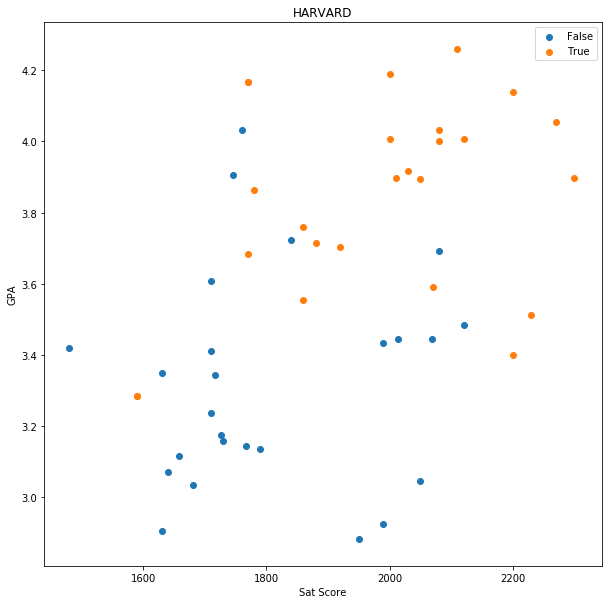

In [310]:
X_harvard, y_harvard = process_data(harvard, "harvard")

Before OverSampling, counts of label '1': 2
Before OverSampling, counts of label '0': 16 

After OverSampling, the shape of train_X: (50, 5)
After OverSampling, the shape of train_y: (50,) 

After OverSampling, counts of label '1': 25
After OverSampling, counts of label '0': 25


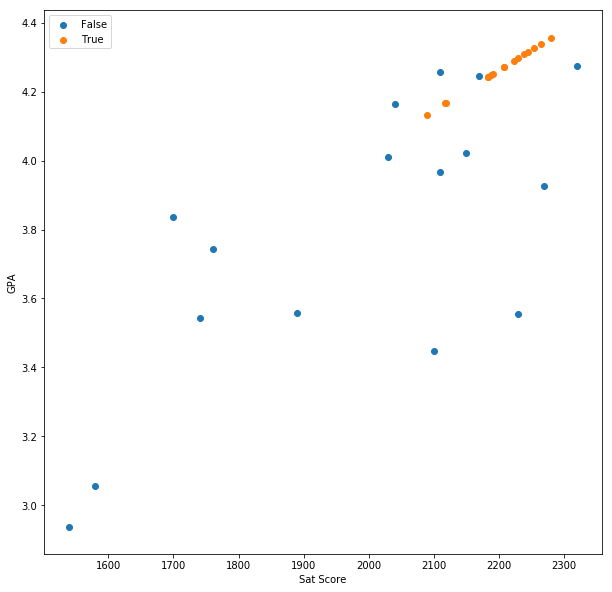

In [228]:
X_northeastern, y_northeastern = process_data(northeastern, "northeastern")

Before OverSampling, counts of label '1': 2
Before OverSampling, counts of label '0': 4 

After OverSampling, the shape of train_X: (50, 5)
After OverSampling, the shape of train_y: (50,) 

After OverSampling, counts of label '1': 25
After OverSampling, counts of label '0': 25


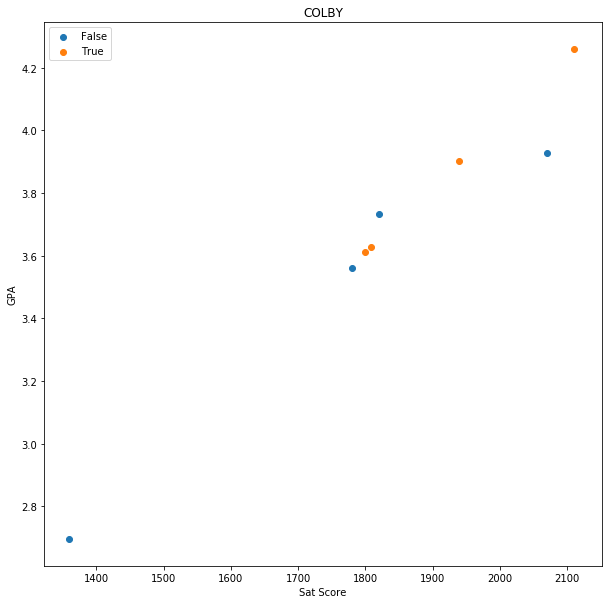

In [311]:
X_colby, y_colby = process_data(colby, "colby")

Before OverSampling, counts of label '1': 5
Before OverSampling, counts of label '0': 15 

After OverSampling, the shape of train_X: (50, 5)
After OverSampling, the shape of train_y: (50,) 

After OverSampling, counts of label '1': 25
After OverSampling, counts of label '0': 25


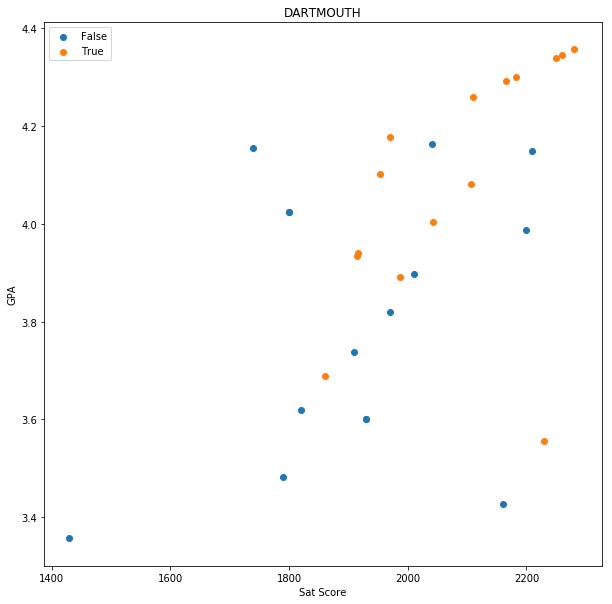

In [312]:
X_dartmouth, y_dartmouth = process_data(dartmouth, "dartmouth")

Before OverSampling, counts of label '1': 2
Before OverSampling, counts of label '0': 31 

After OverSampling, the shape of train_X: (50, 5)
After OverSampling, the shape of train_y: (50,) 

After OverSampling, counts of label '1': 25
After OverSampling, counts of label '0': 25


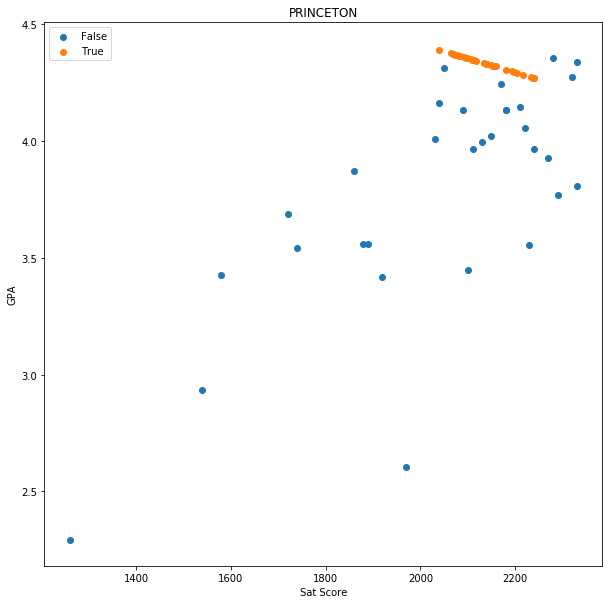

In [313]:
X_princeton, y_princeton = process_data(princeton, "princeton")

In [307]:
qda = QuadraticDiscriminantAnalysis()
qda_model = qda.fit(X_columbia, y_columbia)
qda_model.score(X_columbia, y_columbia)

0.7631578947368421

In [257]:
qda_model.predict_proba([[1200, 3.5]])

array([[0.7828613, 0.2171387]])

In [306]:
kernel = 1.0 * RBF(0.5)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=1).fit(X_columbia, y_columbia)
gpc.score(X_columbia, y_columbia)

0.75

In [288]:
gnb = GaussianNB().fit(X_dartmouth, y_dartmouth)
gnb.score(X_dartmouth, y_dartmouth)

0.7333333333333333

In [282]:
gnb.predict_proba([[2100, 4.15]])

array([[0.40822845, 0.59177155]])

In [305]:
rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0).fit(X_columbia, y_columbia)
rf.score(X_columbia, y_columbia)

0.8947368421052632

In [302]:
rf.predict_proba([[2100, 3.5]])

array([[0.77642857, 0.22357143]])

In [317]:
def qda_predict(X,y):
    """
    can be used for Harvard dataset
    predictions:= qda_model.predict_proba([[1200, 3.5]])
    """
    return QuadraticDiscriminantAnalysis().fit(X, y)

In [318]:
def gaussian_nb(X,y):
    """
    for northeastern and princeton
    predictions := gnb.predict_proba([[2100, 4.15]])
    """
    return GaussianNB().fit(X, y)

In [320]:
def random_forest(X,y):
    """
    for Dartmouth and columbia
    predictions := rf.predict_proba([[2100, 3.5]])
    """
    return RandomForestClassifier(n_estimators=10, max_depth=3, random_state=2).fit(X, y)